# Notebook Instructions
<i>You can run the notebook document sequentially (one cell a time) by pressing <b> shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i>

In [1]:
# Define period of backtesting
from datetime import date
start_date = date(2017,1,1)
end_date = date(2018,10,30)

# Define instrument name
instrument_list = [
                        'ALBK',
                        'ANDHRABANK',
                        'BANKBARODA',
                        'BANKINDIA',
                        'CANBK',
                        'IDBI',
                        'INDIANB',
                        'ORIENTBANK',
                        'PNB',
                        'SBIN',
                        'SYNDIBANK',
                        'UNIONBANK'
                  ]

In [2]:
# Import the libraries and modules required in the strategy
from data import get_stock_data
from alpha import sma_crossover
import pandas as pd
from performance_analytics import compute_ret

short_lookback = 2
long_lookback = 7

portfolio = pd.DataFrame()

for instrument_name in instrument_list:
    try:
        # Fetch data
        data = get_stock_data(instrument_name,start_date,end_date)
        data = sma_crossover(data, short_lookback, long_lookback)
        
        # Aplhas
        data = data.dropna()
        data['signal'] = data['sma_signal']        
        
        # Calculate the returns
        data = compute_ret(data)
        portfolio['ret_'+instrument_name] = data.strategy_ret
    except Exception as e:
        print(e,instrument_name)

portfolio.iloc[:5,:5]

,ret_ALBK,ret_ANDHRABANK,ret_BANKBARODA,ret_BANKINDIA,ret_CANBK
Date,,,,,
2017-01-10,NaN,NaN,NaN,NaN,NaN
2017-01-11,0.023401,0.022610,0.043478,0.026966,0.028284
2017-01-12,0.002287,-0.006030,-0.005639,-0.000875,-0.004162
2017-01-13,-0.001521,-0.003033,-0.005986,-0.001314,0.003453
2017-01-16,0.008378,0.006085,0.011727,0.011842,0.007606


In [3]:
portfolio['strategy_ret'] = portfolio.mean(axis=1)
portfolio.strategy_ret.head()

Date
2017-01-10         NaN
2017-01-11    0.032590
2017-01-12   -0.003106
2017-01-13   -0.001787
2017-01-16    0.009397
Name: strategy_ret, dtype: float64

### Daily strategy returns histogram

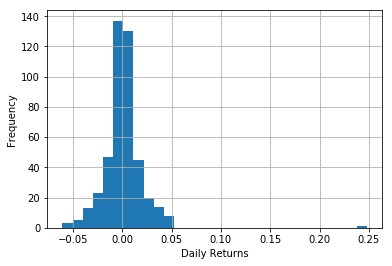

In [4]:
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

portfolio.strategy_ret.hist(bins=30)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

### Cumulative strategy returns

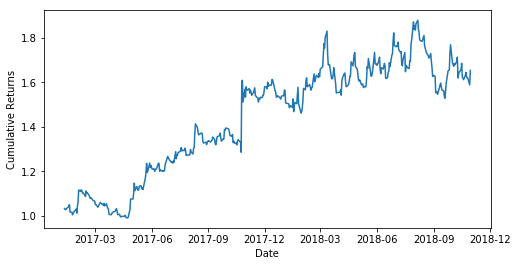

In [5]:
(portfolio.strategy_ret + 1.0).cumprod().plot(figsize=(8,4))
plt.ylabel('Cumulative Returns')
plt.show()

### Rolling Sharpe ratio

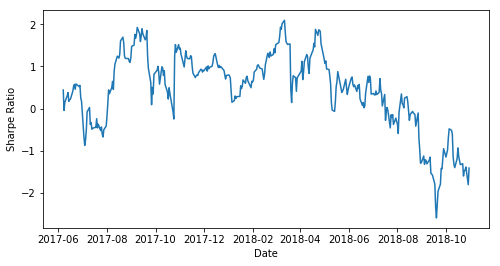

In [6]:
from performance_analytics import rolling_sharpe
portfolio = rolling_sharpe(data, window=100)
portfolio.sharpe.plot(figsize=(8,4))
plt.ylabel('Sharpe Ratio')
plt.show()

### Rolling Volatility

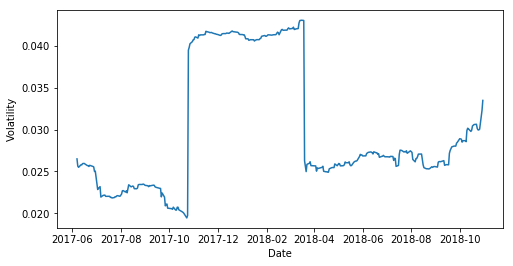

In [7]:
# Import rolling_volatility function from performance_analytics
from performance_analytics import rolling_volatility

# Call the rolling_vol function and store the output in portfolio
portfolio = rolling_volatility(portfolio,window=100)

# Plot the rolling volatility
portfolio.volatility.plot(figsize=(8,4))

# Y-label
plt.ylabel('Volatility')

# Show the plot
plt.show()